# Introduction to Networkx
- Aluno: Leonardo Meireles Murtha Oliveira
- NUSP: 4182085

In [2]:
import networkx as nx

In [3]:
# Creating an empty graph
G = nx.Graph()

In [4]:
# To add edges in the graph use add_edge
G.add_edge('a','b', weight=0.1)
G.add_edge('a','c', weight=0.5)
G.add_edge('b','c', weight=0.3)
G.add_edge('a','d', weight=0.9)

In [5]:
# The visualization is done with matplotlib
import matplotlib.pyplot as plt

/home/leo/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


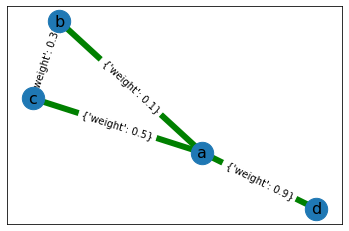

In [6]:
# Adding labels and saving fig to a file
labels = G.nodes() # Returns nodeview
pos = nx.spring_layout(G) # Position nodes using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx(G, with_labels = True, nodecolor='b', edge_color='g', node_size=500, font_size=16, pos=pos, width=6)
nx.draw_networkx_edge_labels(G, pos)
plt.savefig('figures/graph_1_intro.pdf')
plt.show(True)

Starting a new empty graph

In [7]:
G1 = nx.Graph()

In [8]:
# Including some nodes
for i in range(1,7):
    G1.add_node('Node%d' % i)

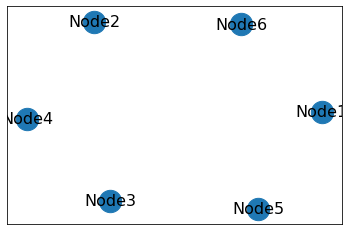

In [9]:
# Drawing the ggraph
nx.draw_networkx(G1, with_labels = True, node_size=500, font_size=16)
plt.show()

In [10]:
# Creating connections
G1.add_edge('Node1','Node2')
G1.add_edge('Node2','Node3')
G1.add_edge('Node1','Node3')
G1.add_edge('Node2','Node4')
G1.add_edge('Node3','Node5')
G1.add_edge('Node5','Node6')

/home/leo/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


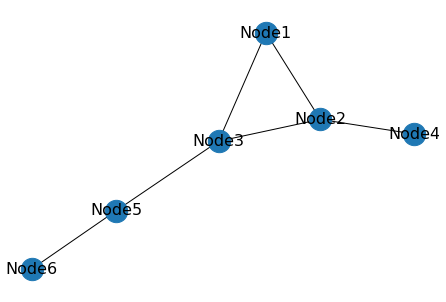

In [11]:
# Plotting with the new connections
pos=nx.spring_layout(G1)
nx.draw(G1, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

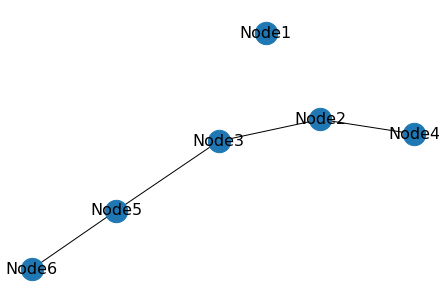

In [12]:
# Removing some edges
G1.remove_edge('Node1','Node2')
G1.remove_edge('Node1','Node3')
nx.draw(G1, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

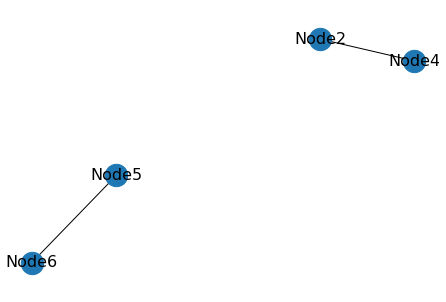

In [13]:
# Also can remove nodes
G1.remove_node('Node1')
G1.remove_node('Node3')
nx.draw(G1, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

## Indexing
Acessing nodes and edges via their att and names

In [14]:
G1.add_node(1, time='5pm')
print(G1.node[1]['time'])

5pm


In [15]:
print(G1.node[1]) # Python dictionary

{'time': '5pm'}


The special edge attribute ’weight’ should always be numeric and holds values used by algorithms requiring weighted edges.

In [16]:
G1.add_edge(1, 2, weight=4.0)

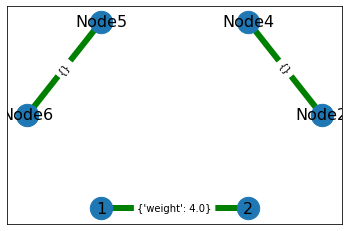

In [17]:
# We can see that some edges do not have weigths associated.
labels = G1.nodes()
pos=nx.circular_layout(G1)
nx.draw_networkx(G1, with_labels = True, nodecolor='b', edge_color='g', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(G1,pos)
plt.show(True)

In [18]:
# It can be useful to change the labels of all nodes to numeric values, starting in zero.
G1 = nx.convert_node_labels_to_integers(G1, first_label = 0)
for node in G1.nodes():
    print('Node', node)

Node 0
Node 1
Node 2
Node 3
Node 4
Node 5


In [20]:
# Accesing atributes of edges easily
for n1 in G1.edges(data=True):
    print(n1)

(0, 1, {})
(2, 3, {})
(4, 5, {'weight': 4.0})


In [21]:
# And attribute weigths to the edges.
for edge in G1.edges():
      G1[edge[0]][edge[1]]['weight'] = 1.5
# Printing...
for n1 in G1.edges(data=True):
      print(n1)

(0, 1, {'weight': 1.5})
(2, 3, {'weight': 1.5})
(4, 5, {'weight': 1.5})


## Graph operators
Using the first graph G

In [23]:
G.clear() # Clearing the configs so far
print(G.nodes())
print(G.edges)

[]
[]


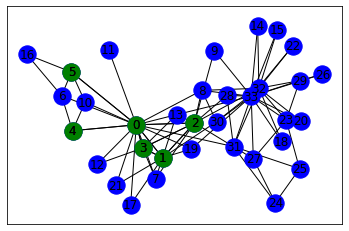

In [25]:
# Let us get a subgraph of the Karate club network. Note that 'node test' does appear in the graph, because it does not exist.
G = nx.karate_club_graph()
subset = [0,1,2,3,4,5, 'node test'] # a set of nodes
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(subset)  
plt.figure()
nx.draw_networkx(G, pos=pos, node_color = 'b')
nx.draw_networkx(k, pos=pos, node_color = 'g')
plt.show(True)